# **<center> Programming Session 2  </center>**


## <center> Introduction to Neural Networks - Solution -  </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://hm-ai.github.io/Practical-Implementations-ENPC/">
    <img src="https://drive.google.com/uc?export=view&id=11gmHR08xN5A23wZ1ZTg6L3x-xhSC9Brx" height="50"/>
    Course page</a>
</td>
  <td>
    <a target="_blank" href="https://drive.google.com/file/d/1blC9b6piH9NMqsUEj63OIvbJJnw0stLX/view?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" height="50" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
# Access files from Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import Basic Modules
import tensorflow as tf # to create neural networks
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # for plots 
plt.style.use('dark_background') # to adapt the colors to a dark background
from IPython.display import Image # for showing graphs from the lectures

# 1. Exploring the dataset

Q1. Load the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset from `tensorflow.keras.datasets`

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Q2. Preprocess the data. Each pixel value is in the range [0-255], Divide the pixel values by 255. to make the training and the testing sets in the range [0, 1] 

In [ ]:
X_train, X_test = X_train.astype('float32')/255., X_test.astype('float32')/255.

Q3. Perform the one hot encoding on the labels using `to_categorical` from `tensorflow.keras.utils`:

Label 2 should be transformed into [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Q4. Plot one of the images using `plt.imshow()`

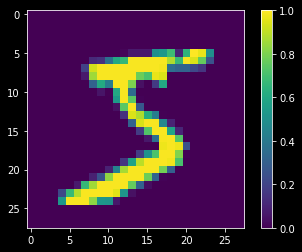

In [ ]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

Q5. Reshape the data. As we want to use a sequence of Dense layers, we should reshape the data: from a 3-dimensional tensor (N, 28, 28) into a 2-dimensional tensor (N, 784)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]**2))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]**2))

# 2. Building the model using Sequential



Q6. Create the following model using `Sequential` from `tensorflow.keras.models` and the `Dense` layer from `tensorflow.keras.layers`

In [ ]:
Image(filename='./gdrive/My Drive/Colab_Notebooks/Session_2/images/model.png',  width=500) 

FileNotFoundError: ignored

In [ ]:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense # The dense layer

model = Sequential()
model.add(Dense(256, activation = "relu", input_shape=(X_train.shape[1],))) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(128, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(64, activation = "relu")) # Add a Dense layer with 64 neurons and relu activation function
model.add(Dense(32, activation = "relu")) # Add a Dense layer with 32 neurons and relu activation function
model.add(Dense(16, activation = "relu")) # Add a Dense layer with 16 neurons and relu activation function
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 244,890
Trainable params: 244,890
Non-trai

# 3. Compile and fit the model 

Q7. Compile the model my specifying:

* The optimizer: The Stochastic Gradient Descent (as shown in the figure below).
* The loss function: [The categorical cross entropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) defined as follows:
$$
J(\theta) = - \frac{1}{N} \sum\limits_{i=1}^N \sum\limits_{k=1}^K \hat{y}_i^k \log(p^k_i)
$$

* The metrics : Accuracy score. 

In [ ]:
Image(filename='./gdrive/My Drive/Colab_Notebooks/Session_2/images/SGD.png',  width=700) 

In [ ]:
model.compile(optimizer = 'sgd', # optimizer Stochastic Gradient Descent
              loss = 'categorical_crossentropy', # loss function 
              metrics = ["acc"]) # accuracy as the evaluation metric

Q8. Fit the model to the data

In [ ]:
N_epochs = 20 # Number of epochs
M = 128 # batch size

history = model.fit(X_train, y_train, # training data
                    epochs = N_epochs, # number of epochs
                    batch_size = M, # batch size 
                    validation_split = 0.3) # 70% train 30% validation 

Epoch 1/20
329/329 [==============================] - 6s 16ms/step - loss: 2.0256 - acc: 0.3425 - val_loss: 1.5683 - val_acc: 0.5826
Epoch 2/20
329/329 [==============================] - 5s 15ms/step - loss: 0.9738 - acc: 0.7371 - val_loss: 0.6350 - val_acc: 0.8097
Epoch 3/20
329/329 [==============================] - 5s 14ms/step - loss: 0.5318 - acc: 0.8425 - val_loss: 0.5159 - val_acc: 0.8327
Epoch 4/20
329/329 [==============================] - 5s 15ms/step - loss: 0.4176 - acc: 0.8790 - val_loss: 0.4470 - val_acc: 0.8617
Epoch 5/20
329/329 [==============================] - 3s 9ms/step - loss: 0.3550 - acc: 0.8983 - val_loss: 0.3189 - val_acc: 0.9064
Epoch 6/20
329/329 [==============================] - 3s 9ms/step - loss: 0.3109 - acc: 0.9099 - val_loss: 0.3288 - val_acc: 0.9042
Epoch 7/20
329/329 [==============================] - 3s 9ms/step - loss: 0.2772 - acc: 0.9204 - val_loss: 0.3809 - val_acc: 0.8784
Epoch 8/20
329/329 [==============================] - 3s 9ms/step - loss

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Q9. Plot the training and the validation loss

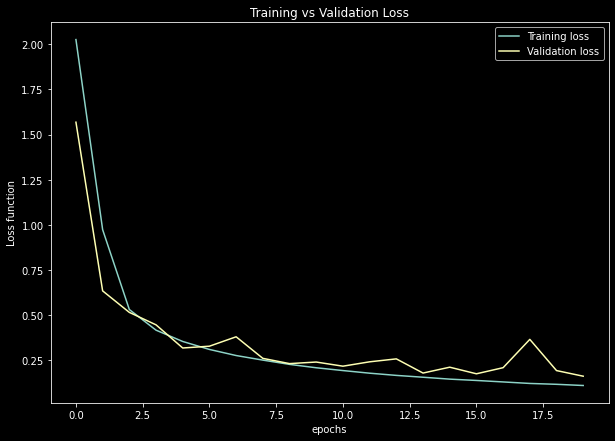

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss function")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

Q10. Plot the training and validation accuracy

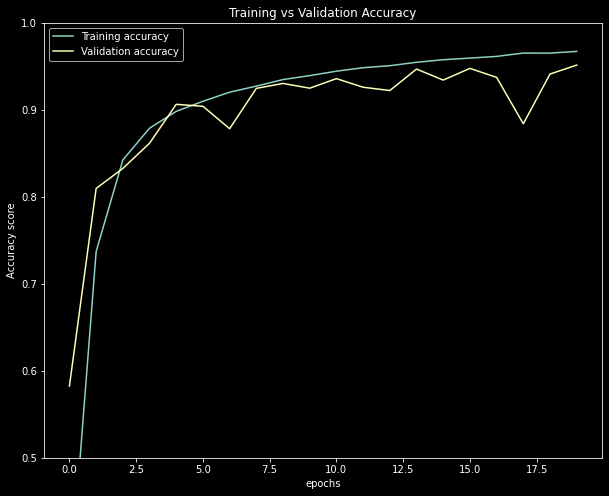

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(N_epochs), history.history["acc"], label = "Training accuracy")
plt.plot(range(N_epochs), history.history["val_acc"], label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy score")
plt.ylim(0.5, 1)
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

Q11. Evaluate the model on the test data

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1387 - acc: 0.9579
Test accuracy: 0.9578999876976013


Q12. Use the trained model to make the predictions of the test images. 

In [ ]:
predictions = model.predict(X_test)

Q13. Check if the first prediction is correct

In [ ]:
predicted_label = np.argmax(predictions[0])

print("The predicted label is: ", predicted_label)

The predicted label is:  7


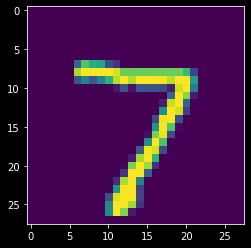

In [ ]:
plt.imshow(X_test[0].reshape(28, 28))

The prediction is correct!

# 4. Fighting Overfitting using Dropout

The choice of the hyperparameters defines the complexity of the model. We would like to find the optimal complexity in order to avoid underfitting or overfitting issues as show in the figure below:

In [ ]:
Image(filename='./gdrive/My Drive/Colab_Notebooks/Session_2/images/Overfitting.png',  width=800) 

One way of avoiding overfitting is to add some regularization techniques like [Dropout](https://keras.io/api/layers/regularization_layers/dropout/). 

Q14. Create the following model, which adds Dropout (with parameter $p=0.2$) to the three first layers of the previous model

In [ ]:
Image(filename='./gdrive/My Drive/Colab_Notebooks/Session_2/images/model_dropout.png',  width=500) 

In [ ]:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense, Dropout # The dense layer

model = Sequential()

model.add(Dense(256, activation = "relu", input_shape=(X_train.shape[1],))) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dropout(0.2))
model.add(Dense(128, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(32, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(16, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 16)               

Q15. Compile the model

In [ ]:
model.compile(optimizer = 'sgd', # optimizer Stochastic Gradient Descent
              loss = 'categorical_crossentropy', # loss function 
              metrics = ["acc"]) # accuracy as the evaluation metric

Q16. Fit the model to the data

In [ ]:
history = model.fit(X_train, y_train, # training data
                    epochs = N_epochs, # number of epochs
                    batch_size = M, # batch size 
                    validation_split = 0.3) # 70% train 30% validation 

Epoch 1/20
329/329 [==============================] - 3s 9ms/step - loss: 2.1757 - acc: 0.2302 - val_loss: 1.8906 - val_acc: 0.3469
Epoch 2/20
329/329 [==============================] - 3s 9ms/step - loss: 1.5677 - acc: 0.4780 - val_loss: 1.0187 - val_acc: 0.7184
Epoch 3/20
329/329 [==============================] - 3s 8ms/step - loss: 0.8914 - acc: 0.7245 - val_loss: 0.5775 - val_acc: 0.8264
Epoch 4/20
329/329 [==============================] - 3s 8ms/step - loss: 0.6082 - acc: 0.8159 - val_loss: 0.4331 - val_acc: 0.8728
Epoch 5/20
329/329 [==============================] - 2s 7ms/step - loss: 0.4882 - acc: 0.8533 - val_loss: 0.3496 - val_acc: 0.8947
Epoch 6/20
329/329 [==============================] - 3s 8ms/step - loss: 0.4210 - acc: 0.8740 - val_loss: 0.3123 - val_acc: 0.9051
Epoch 7/20
329/329 [==============================] - 2s 7ms/step - loss: 0.3788 - acc: 0.8865 - val_loss: 0.2850 - val_acc: 0.9147
Epoch 8/20
329/329 [==============================] - 3s 8ms/step - loss: 0.

Q17. Plot the training and validation loss

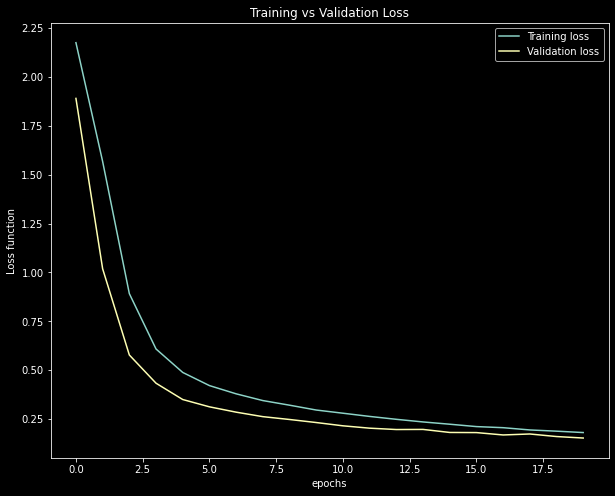

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss function")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

Q18. Plot the training and validation accuracy

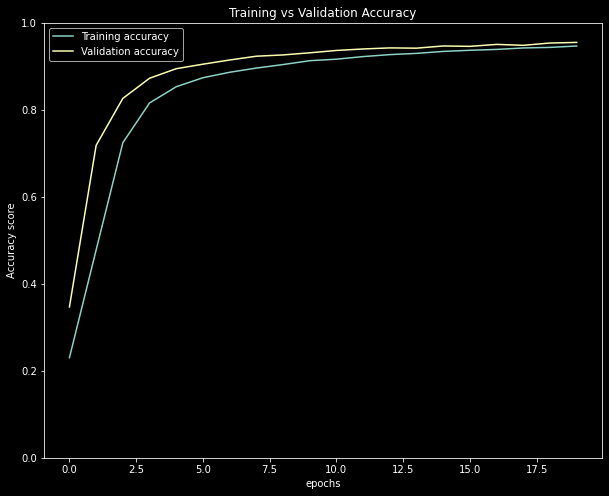

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(N_epochs), history.history["acc"], label = "Training accuracy")
plt.plot(range(N_epochs), history.history["val_acc"], label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy score")
plt.ylim(0, 1)
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

Q19. Evaluate the model on the test data

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1339 - acc: 0.9596
Test accuracy: 0.9595999717712402


Q20. Predict the labels of the test images

In [ ]:
predictions = model.predict(X_test)

# Exercises

1/ Try different architectures on another dataset like the [fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset from `tensorflow.keras.datasets`. 

This dataset includes 60 000 images for training and 10 000 images for validation. There are 10 different integers labels ranging from 0-9. Each integer represets a specific article of clothing (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)


2/ Perform some hyperparameters tuning using keras tuner. 

In Keras Tuner, the hyperparameters can be of different type (Float, Int, Boolean and Choice) and a unique name.

There are many options you might add to help guide the search need to be set:

  * a minimal, a maximal and a default value and a step value for the **Float** and **Int** types
  * a set of possible values if the type is **Choice**
  * For the hyperparameters like **the learning rate** you might want to add the sampling method (linear, log...)

To perform hyper tuning, we need to define:
  * The space of hyperparameters
  * The model we set up for hypertuning called **hypermodel**

There are many methods:
  * **GridSearch**: which runs the model for all the combinations, which might take some time
  * **Random Search**: which runs the model on a subpart of the Search Space
  * **Hyperband**: Which optimizes Random Search in terms of search time by using EarlyStopping to speed up the tuning process. The idea is to fit a large number of models for a small number of epochs and only continue training for the best models (on validation data of course)

Some references for that 
* [keras Tuner Documentation](https://keras-team.github.io/keras-tuner/)
* [Practical Bayesian Optimization of Machine Learning Algorithms](https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf)
* [Algorithms for Hyper-Parameter Optimization](https://papers.nips.cc/paper/4443-algorithms-for-hyper-parameter-optimization.pdf)

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train, X_test = X_train.astype('float32')/255., X_test.astype('float32')/255.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

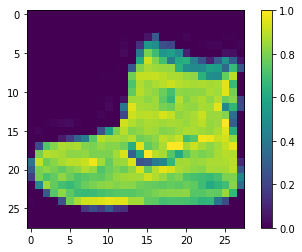

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [ ]:
X_train, X_test=X_train.reshape(X_train.shape[0],X_train.shape[1]**2), X_test.reshape(X_test.shape[0],X_test.shape[1]**2)

In [ ]:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense # The dense layer

model = Sequential()
model.add(Dense(256, activation = "relu", input_shape=(X_train.shape[1],))) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(128, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(64, activation = "relu")) # Add a Dense layer with 64 neurons and relu activation function
model.add(Dense(32, activation = "relu")) # Add a Dense layer with 32 neurons and relu activation function
model.add(Dense(16, activation = "relu")) # Add a Dense layer with 16 neurons and relu activation function
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 10)                170       
                                                                 
Total params: 244,890
Trainable params: 244,890
Non-tr

In [ ]:
model.compile(optimizer = 'sgd', # optimizer Stochastic Gradient Descent
              loss = 'categorical_crossentropy', # loss function 
              metrics = ["acc"]) # accuracy as the evaluation metric

In [ ]:
N_epochs = 100 # Number of epochs
M = 128 # batch size

history = model.fit(X_train, y_train, # training data
                    epochs = N_epochs, # number of epochs
                    batch_size = M, # batch size 
                    validation_split = 0.3) # 70% train 30% validation 

Epoch 1/100
329/329 [==============================] - 3s 8ms/step - loss: 1.7634 - acc: 0.4039 - val_loss: 1.0489 - val_acc: 0.6621
Epoch 2/100
329/329 [==============================] - 2s 7ms/step - loss: 0.8399 - acc: 0.6966 - val_loss: 0.7696 - val_acc: 0.7304
Epoch 3/100
329/329 [==============================] - 3s 8ms/step - loss: 0.6742 - acc: 0.7679 - val_loss: 0.9678 - val_acc: 0.6308
Epoch 4/100
329/329 [==============================] - 2s 7ms/step - loss: 0.5957 - acc: 0.7989 - val_loss: 0.6343 - val_acc: 0.7804
Epoch 5/100
329/329 [==============================] - 2s 7ms/step - loss: 0.5407 - acc: 0.8142 - val_loss: 0.8867 - val_acc: 0.6534
Epoch 6/100
329/329 [==============================] - 2s 7ms/step - loss: 0.5055 - acc: 0.8240 - val_loss: 0.4905 - val_acc: 0.8298
Epoch 7/100
329/329 [==============================] - 3s 8ms/step - loss: 0.4812 - acc: 0.8313 - val_loss: 0.6473 - val_acc: 0.7554
Epoch 8/100
329/329 [==============================] - 3s 8ms/step - 

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

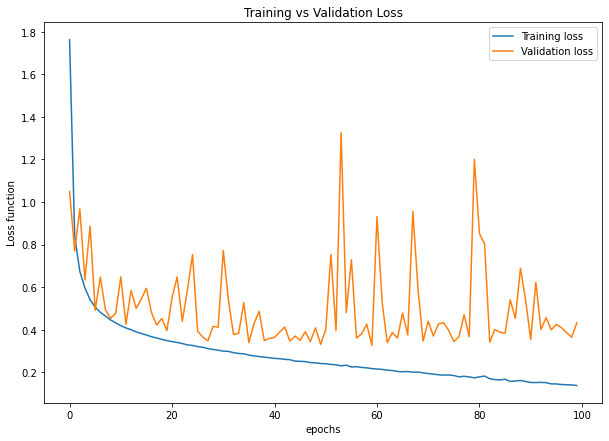

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss function")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

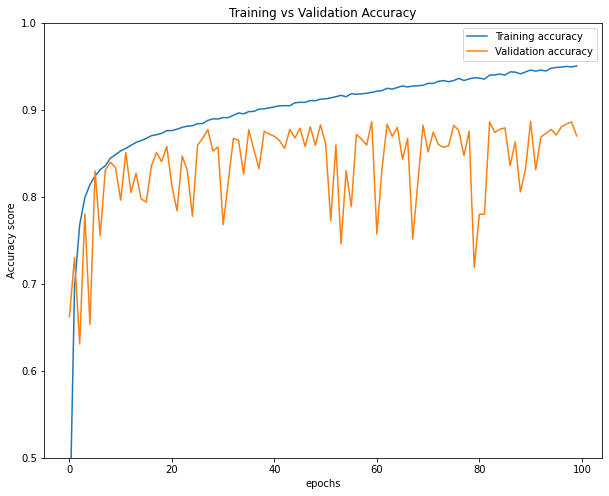

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(N_epochs), history.history["acc"], label = "Training accuracy")
plt.plot(range(N_epochs), history.history["val_acc"], label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy score")
plt.ylim(0.5, 1)
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense, Dropout # The dense layer

model = Sequential()

model.add(Dense(256, activation = "relu", input_shape=(X_train.shape[1],))) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dropout(0.2))
model.add(Dense(128, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(32, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(16, activation = "relu")) # Add a Dense layer with 128 neurons and relu activation function
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)               

In [ ]:
model.compile(optimizer = 'sgd', # optimizer Stochastic Gradient Descent
              loss = 'categorical_crossentropy', # loss function 
              metrics = ["acc"]) # accuracy as the evaluation metric

In [ ]:
history = model.fit(X_train, y_train, # training data
                    epochs = N_epochs, # number of epochs
                    batch_size = M, # batch size 
                    validation_split = 0.3) # 70% train 30% validation 

Epoch 1/100
329/329 [==============================] - 4s 9ms/step - loss: 1.6690 - acc: 0.4104 - val_loss: 1.0307 - val_acc: 0.6503
Epoch 2/100
329/329 [==============================] - 3s 8ms/step - loss: 0.9833 - acc: 0.6519 - val_loss: 0.8318 - val_acc: 0.6712
Epoch 3/100
329/329 [==============================] - 3s 8ms/step - loss: 0.8182 - acc: 0.7092 - val_loss: 0.7199 - val_acc: 0.7298
Epoch 4/100
329/329 [==============================] - 3s 8ms/step - loss: 0.7247 - acc: 0.7440 - val_loss: 0.6552 - val_acc: 0.7686
Epoch 5/100
329/329 [==============================] - 3s 9ms/step - loss: 0.6569 - acc: 0.7678 - val_loss: 0.5769 - val_acc: 0.7954
Epoch 6/100
329/329 [==============================] - 3s 8ms/step - loss: 0.6110 - acc: 0.7852 - val_loss: 0.5453 - val_acc: 0.8074
Epoch 7/100
329/329 [==============================] - 3s 9ms/step - loss: 0.5755 - acc: 0.7985 - val_loss: 0.5145 - val_acc: 0.8152
Epoch 8/100
329/329 [==============================] - 3s 8ms/step - 

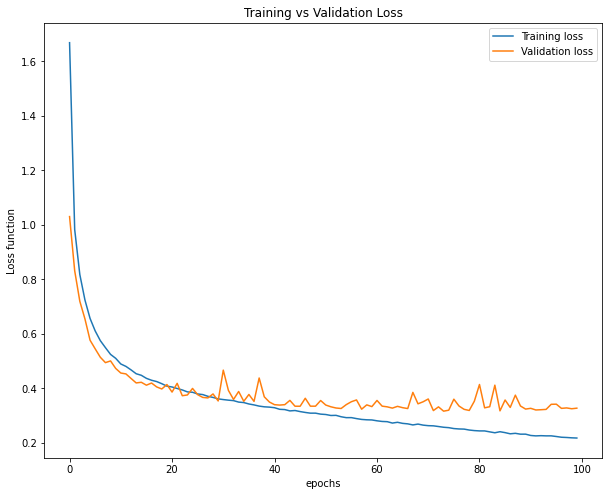

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.xlabel("epochs")
plt.ylabel("Loss function")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

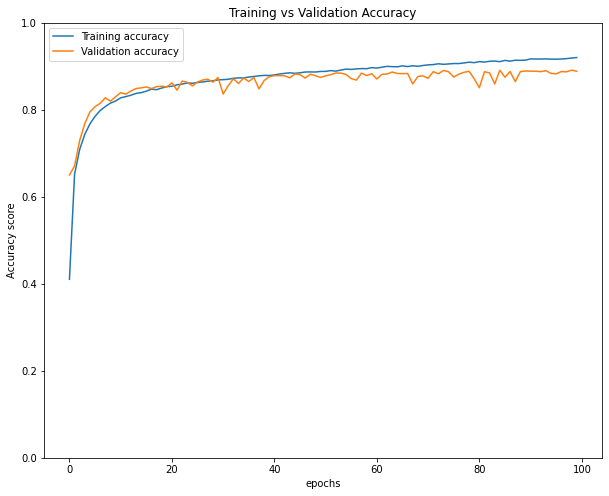

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(range(N_epochs), history.history["acc"], label = "Training accuracy")
plt.plot(range(N_epochs), history.history["val_acc"], label = "Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy score")
plt.ylim(0, 1)
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
!pip install keras-tuner --upgrade
import keras_tuner as kt
from tensorflow import keras

     |████████████████████████████████| 98 kB 3.6 MB/s 


In [ ]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 3 Complete [00h 00m 17s]
val_loss: 0.09000016748905182

Best val_loss So Far: 0.09000016748905182
Total elapsed time: 00h 00m 53s
INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model.best_model.keys()

AttributeError: ignored